<a href="https://colab.research.google.com/github/Matsalak-Viktoria/Team_3/blob/Chatbot/Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyagrum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 9.7 MB/s eta 0:00:00


In [2]:
%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt
from IPython.display import display,HTML

import os

import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import math

In [3]:
bn=gum.BayesNet('PsyMonitor')

In [4]:
p = bn.add(gum.LabelizedVariable('p', 'Personality', 5))

In [5]:
!pip install azure-ai-language-conversations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.0/122.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.4/192.4 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.8.0 which is incompatible.


In [6]:
from google.colab import files
uploaded = files.upload()

Saving Items.csv to Items.csv


In [7]:
import csv
from azure.core.credentials import AzureKeyCredential
from azure.ai.language.conversations import ConversationAnalysisClient

clu_endpoint = "https://psymonitor.cognitiveservices.azure.com/"
clu_key = "fb821673335b408f9b324740f5c3291a"
project_name = "PsyMonitor"
deployment_name = "PsyMonitor"


def personalityFeedbackAnalyse(query):
    client = ConversationAnalysisClient(clu_endpoint, AzureKeyCredential(clu_key))
    with client:
        return client.analyze_conversation(
            task={
                "kind": "Conversation",
                "analysisInput": {
                    "conversationItem": {
                        "participantId": "1",
                        "id": "1",
                        "modality": "text",
                        "language": "it",
                        "text": query
                    },
                    "isLoggingEnabled": False
                },
                "parameters": {
                    "projectName": project_name,
                    "deploymentName": deployment_name,
                    "verbose": True
                }
            }
        )

count = 0

# Total sum of scores
sum_s_t = 0

# Sum of scores for Factor 1
sum_s_1 = 0

# Sum of scores for Factor 2
sum_s_2 = 0

# Sum of scores for Factor 3
sum_s_3 = 0

# Sum of scores for Factor 4
sum_s_4 = 0

# Sum of scores for Factor 5
sum_s_5 = 0



# Items from csv file
with open("Items.csv", "r") as file:
    for i, row in enumerate(csv.reader(file)):
        print(row[0])
        print("- Very Inaccurate \n- Moderately Inaccurate\n- Neither Accurate Nor Inaccurate"
              " \n- Moderately Accurate \n- Very Accurate")
        answer = input("Enter your answer: ")
        result = personalityFeedbackAnalyse(answer)
        if (i % 2 == 0 and i != 28 and i != 38 and i != 48) or i == 39 or i == 41 or i == 47 or i == 49:
            if result["result"]["prediction"]["topIntent"] == "StrongDisagree":
                answer = 1
            elif result["result"]["prediction"]["topIntent"] == "Disagree":
                answer = 2
            elif result["result"]["prediction"]["topIntent"] == "NeitherAgree":
                answer = 3
            elif result["result"]["prediction"]["topIntent"] == "Agree":
                answer = 4
            else:
                answer = 5
        else:
            if result["result"]["prediction"]["topIntent"] == "StrongDisagree":
                answer = 5
            elif result["result"]["prediction"]["topIntent"] == "Disagree":
                answer = 4
            elif result["result"]["prediction"]["topIntent"] == "NeitherAgree":
                answer = 3
            elif result["result"]["prediction"]["topIntent"] == "Agree":
                answer = 2
            else:
                answer = 1

        if count == 0:
            sum_s_1 += answer
            count += 1
        elif count == 1:
            sum_s_2 += answer
            count += 1
        elif count == 2:
            sum_s_3 += answer
            count += 1
        elif count == 3:
            sum_s_4 += answer
            count += 1
        else:
            sum_s_5 += answer
            count = 0

        sum_s_t += answer
        print()

val_1 = sum_s_1 / sum_s_t
val_2 = sum_s_2 / sum_s_t
val_3 = sum_s_3 / sum_s_t
val_4 = sum_s_4 / sum_s_t
val_5 = sum_s_5 / sum_s_t

print("Sum of scores for Factor 1:", sum_s_1)
print("Sum of scores for Factor 2:", sum_s_2)
print("Sum of scores for Factor 3:", sum_s_3)
print("Sum of scores for Factor 4:", sum_s_4)
print("Sum of scores for Factor 5:", sum_s_5)
print("Total sum of scores:", sum_s_t)
print("Value 1: {0:.2f}".format(val_1))
print("Value 2: {0:.2f}".format(val_2))
print("Value 3: {0:.2f}".format(val_3))
print("Value 4: {0:.2f}".format(val_4))
print("Value 5: {0:.2f}".format(val_5))

1. Am the life of the party.
- Very Inaccurate 
- Moderately Inaccurate
- Neither Accurate Nor Inaccurate 
- Moderately Accurate 
- Very Accurate
Enter your answer: Assolutamente no

2. Feel little concern for others.
- Very Inaccurate 
- Moderately Inaccurate
- Neither Accurate Nor Inaccurate 
- Moderately Accurate 
- Very Accurate
Enter your answer: Assolutamente no

3. Am always prepared.
- Very Inaccurate 
- Moderately Inaccurate
- Neither Accurate Nor Inaccurate 
- Moderately Accurate 
- Very Accurate
Enter your answer: Assolutamente no

4. Get stressed out easily.
- Very Inaccurate 
- Moderately Inaccurate
- Neither Accurate Nor Inaccurate 
- Moderately Accurate 
- Very Accurate
Enter your answer: Assolutamente no

5. Have a rich vocabulary.
- Very Inaccurate 
- Moderately Inaccurate
- Neither Accurate Nor Inaccurate 
- Moderately Accurate 
- Very Accurate
Enter your answer: Assolutamente no

6. Don't talk a lot.
- Very Inaccurate 
- Moderately Inaccurate
- Neither Accurate Nor I

In [8]:
bn.cpt('p').fillWith([val_1,val_2,val_3,val_4,val_5])
bn.cpt('p').normalizeAsCPT()


(pyAgrum.Potential<double>@0x59b61b5c5bc0) 
  p                                              |
0        |1        |2        |3        |4        |
---------|---------|---------|---------|---------|
 0.2055  | 0.1781  | 0.1781  | 0.2877  | 0.1507  |

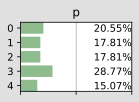

In [9]:
ie=gum.LazyPropagation(bn)
ie.makeInference()
gnb.showProba(ie.posterior("p"))

In [10]:
var = gum.DiscretizedVariable('Topic1', 'Potresti raccontarmi le difficoltà che riscontri quando studi?')
var.addTick(0)
var.addTick(1/3)
var.addTick(2/3)
var.addTick(1)

Topic1 = bn.add(var)

var = gum.DiscretizedVariable('Topic2', 'Potresti raccontarmi perché hai difficoltà a stringere amicizie?')
var.addTick(0)
var.addTick(1/3)
var.addTick(2/3)
var.addTick(1)

Topic2 =bn.add(var)

var = gum.DiscretizedVariable('Topic3', 'Potresti descrivermi nel dettaglio il tuo rapporto con i tuoi genitori?')
var.addTick(0)
var.addTick(1/3)
var.addTick(2/3)
var.addTick(1)

Topic3 =bn.add(var)



In [11]:
bn.addArc(p,Topic1)
bn.addArc(p,Topic2)
bn.addArc(p,Topic3)

In [26]:
bn.cpt('Topic1').fillWith(gum.randomDistribution(15))

(pyAgrum.Potential<double>@0x59b61b889440) 
      ||  Topic1                     |
p     ||[0;0.3333|[0.333333|[0.666667|
------||---------|---------|---------|
0     || 0.0372  | 0.1066  | 0.0855  |
1     || 0.0719  | 0.0721  | 0.1052  |
2     || 0.0556  | 0.1064  | 0.0012  |
3     || 0.1028  | 0.0957  | 0.0086  |
4     || 0.0528  | 0.0232  | 0.0753  |

In [27]:
bn.cpt('Topic2').fillWith(gum.randomDistribution(15))

(pyAgrum.Potential<double>@0x59b61bc28f20) 
      ||  Topic2                     |
p     ||[0;0.3333|[0.333333|[0.666667|
------||---------|---------|---------|
0     || 0.1432  | 0.0555  | 0.0204  |
1     || 0.0648  | 0.1175  | 0.0429  |
2     || 0.0100  | 0.0614  | 0.0407  |
3     || 0.1147  | 0.0913  | 0.0515  |
4     || 0.0164  | 0.1197  | 0.0501  |

In [28]:
bn.cpt('Topic3').fillWith(gum.randomDistribution(15))

(pyAgrum.Potential<double>@0x59b61b55ff00) 
      ||  Topic3                     |
p     ||[0;0.3333|[0.333333|[0.666667|
------||---------|---------|---------|
0     || 0.0561  | 0.1185  | 0.0056  |
1     || 0.0619  | 0.0091  | 0.1003  |
2     || 0.0106  | 0.1142  | 0.0564  |
3     || 0.1013  | 0.1130  | 0.0933  |
4     || 0.0182  | 0.1088  | 0.0326  |

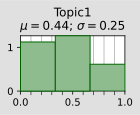

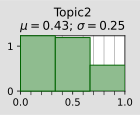

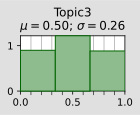

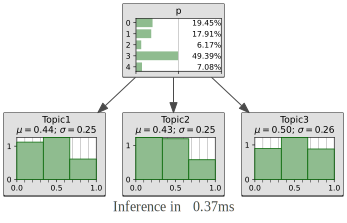

In [29]:
ie=gum.LazyPropagation(bn)
ie.makeInference()
gnb.showProba(ie.posterior("Topic1"))
gnb.showProba(ie.posterior("Topic2"))
gnb.showProba(ie.posterior("Topic3"))
gnb.showInference(bn)


In [30]:
print('Entropy of Topic1 is', ie.posterior('Topic1').entropy())
print('Entropy of Topic2 is', ie.posterior('Topic2').entropy())
print('Entropy of Topic3 is', ie.posterior('Topic3').entropy())

Entropy of Topic1 is 1.524260855233362
Entropy of Topic2 is 1.5138883172310287
Entropy of Topic3 is 1.5682577885087132


In [ ]:
pip install neo4j

In [ ]:
from neo4j import GraphDatabase

# URI examples: "neo4j://localhost", "neo4j+s://xxx.databases.neo4j.io"
URI = "neo4j+s://85b0c276.databases.neo4j.io:7687"
AUTH = ("neo4j", "HoO3Xi8_f1rELFPWaiGAH_UswDErhK2K_t6QeyolOG4")

with GraphDatabase.driver(URI, auth=AUTH) as driver:
    driver.verify_connectivity()

In [17]:
!pip install azure-ai-textanalytics==5.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.3/239.3 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 7.0 MB/s eta 0:00:00



Potresti descrivermi nel dettaglio il tuo rapporto con i tuoi genitori?

Enter your answer: Litigo spesso con loro, non mi sento supportato. Ho l'impressione di non riuscire a soddisfare le loro aspettative.
Negative: 0.88
Neutral: 0.11
Positive: 0.01

Entropy of Topics before establishing the evidence:
Entropy of Topic1 is 1.524260855233362
Entropy of Topic2 is 1.5138883172310287
Entropy of Topic3 is 1.5682577885087132

Negative, neutral, positive values before establishing the evidence:
Negative: 0.88
Neutral: 0.11
Positive: 0.01

BN before establishing the evidence



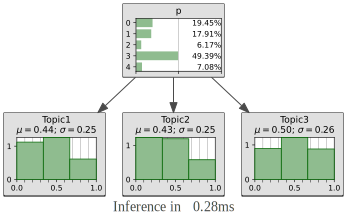


Personality node before establishing the evidence



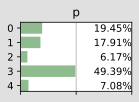


0.1945437340345747
0.17905235855452287
0.0617145422972817
0.4938877788799651
0.07080158623365562

Node Topic1 before establishing the evidence



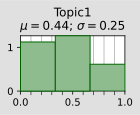


0.3740988712945621
0.4214455245383314
0.2044556041671065

Node Topic2 before establishing the evidence



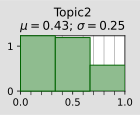


0.4104132513893536
0.3972064286033183
0.19238032000732813

Node Topic3 before establishing the evidence



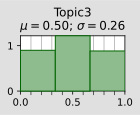


0.29952520697921076
0.4061370522993375
0.2943377407214518

Dictionary before establishing the evidence
{}


Dictionary after establishing the evidence
{'p': array([0.19454373, 0.17905236, 0.06171454, 0.49388778, 0.07080159]), 'Topic3': array([0.88, 0.11, 0.01])}


Personality node after establishing the evidence



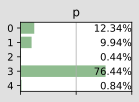


0.12340366023563668
0.09942834007250849
0.004443644907976782
0.7643645696090023
0.008359785174875544

Node Topic1 after establishing the evidence



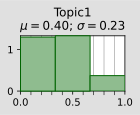


0.4325390682255001
0.4433791723036034
0.12408175947089661

Node Topic2 after establishing the evidence



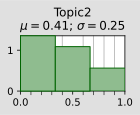


0.4508365644706404
0.362060109742543
0.18710332578681654

Node Topic3 after establishing the evidence



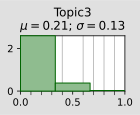


0.8646656336464887
0.12629017340827514
0.009044192945236134

Entropy of Topics after establishing the evidence:
Entropy of Topic1 is 1.4168025100568409
Entropy of Topic2 is 1.501261400377389
Entropy of Topic3 is 0.6197932938460912

BN after establishing the evidence



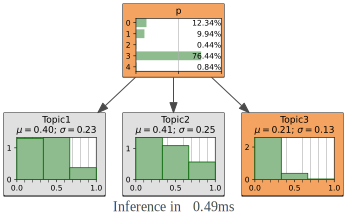


Potresti raccontarmi perché hai difficoltà a stringere amicizie?

Enter your answer: Sono timido ed impacciato, non riesco a socializzare con facilità.
Negative: 0.96
Neutral: 0.03
Positive: 0.01

Entropy of Topics before establishing the evidence:
Entropy of Topic1 is 1.4168025100568409
Entropy of Topic2 is 1.501261400377389
Entropy of Topic3 is 0.6197932938460912

Negative, neutral, positive values before establishing the evidence:
Negative: 0.96
Neutral: 0.03
Positive: 0.01

BN before establishing the evidence



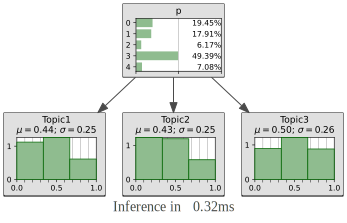


Personality node before establishing the evidence



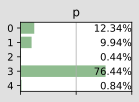


0.12340366023563668
0.09942834007250849
0.004443644907976782
0.7643645696090023
0.008359785174875544

Node Topic1 before establishing the evidence



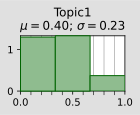


0.4325390682255001
0.4433791723036034
0.12408175947089661

Node Topic2 before establishing the evidence



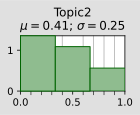


0.4508365644706404
0.362060109742543
0.18710332578681654

Node Topic3 before establishing the evidence



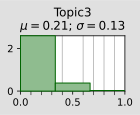


0.8646656336464887
0.12629017340827514
0.009044192945236134

Dictionary before establishing the evidence
{'p': array([0.19454373, 0.17905236, 0.06171454, 0.49388778, 0.07080159]), 'Topic3': array([0.88, 0.11, 0.01])}


Dictionary after establishing the evidence
{'p': array([0.12340366, 0.09942834, 0.00444364, 0.76436457, 0.00835979]), 'Topic3': array([0.88, 0.11, 0.01]), 'Topic2': array([0.96, 0.03, 0.01])}


Personality node after establishing the evidence



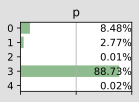


0.08483110675804544
0.027663634760327436
5.7615045742273586e-05
0.8872685914577106
0.00017905197817425379

Node Topic1 after establishing the evidence



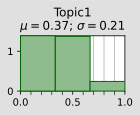


0.46223214179322863
0.4573544762309289
0.08041338197584252

Node Topic2 after establishing the evidence



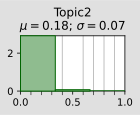


0.9716834717539484
0.02397630898873068
0.004340219257320842

Node Topic3 after establishing the evidence



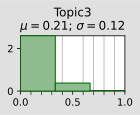


0.8653853589074894
0.12596413545181923
0.008650505640691484

Entropy of Topics after establishing the evidence:
Entropy of Topic1 is 1.3232020501800283
Entropy of Topic2 is 0.20337670129610655
Entropy of Topic3 is 0.6162847518970088

BN after establishing the evidence



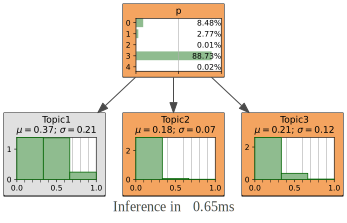


Potresti raccontarmi le difficoltà che riscontri quando studi?

Enter your answer: Non riesco a concentrarmi, sono sempre distratto.
Negative: 0.8
Neutral: 0.17
Positive: 0.02

Entropy of Topics before establishing the evidence:
Entropy of Topic1 is 1.3232020501800283
Entropy of Topic2 is 0.20337670129610655
Entropy of Topic3 is 0.6162847518970088

Negative, neutral, positive values before establishing the evidence:
Negative: 0.8
Neutral: 0.17
Positive: 0.02

BN before establishing the evidence



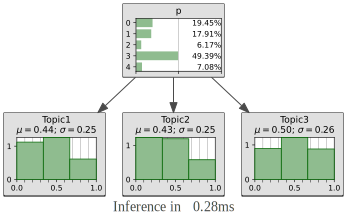


Personality node before establishing the evidence



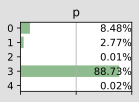


0.08483110675804544
0.027663634760327436
5.7615045742273586e-05
0.8872685914577106
0.00017905197817425379

Node Topic1 before establishing the evidence



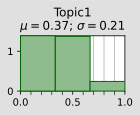


0.46223214179322863
0.4573544762309289
0.08041338197584252

Node Topic2 before establishing the evidence



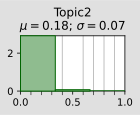


0.9716834717539484
0.02397630898873068
0.004340219257320842

Node Topic3 before establishing the evidence



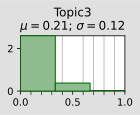


0.8653853589074894
0.12596413545181923
0.008650505640691484

Dictionary before establishing the evidence
{'p': array([0.12340366, 0.09942834, 0.00444364, 0.76436457, 0.00835979]), 'Topic3': array([0.88, 0.11, 0.01]), 'Topic2': array([0.96, 0.03, 0.01])}


Dictionary after establishing the evidence
{'p': array([8.48311068e-02, 2.76636348e-02, 5.76150457e-05, 8.87268591e-01,
       1.79051978e-04]), 'Topic3': array([0.88, 0.11, 0.01]), 'Topic2': array([0.96, 0.03, 0.01]), 'Topic1': array([0.8 , 0.17, 0.02])}


Personality node after establishing the evidence



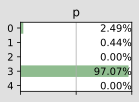


0.024944405764719547
0.004391294210811049
5.667903933816443e-07
0.9706613426186614
2.3906154145915304e-06

Node Topic1 after establishing the evidence



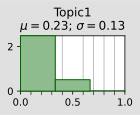


0.8274637032656256
0.16984802989178355
0.002688266842590978

Node Topic2 after establishing the evidence



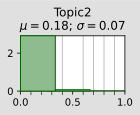


0.9715286681076313
0.023996883254654978
0.0044744486377137046

Node Topic3 after establishing the evidence



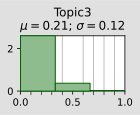


0.8679998688073366
0.12306014887305973
0.008939982319603773

Entropy of Topics after establishing the evidence:
Entropy of Topic1 is 0.6834625398380816
Entropy of Topic2 is 0.20453146147438447
Entropy of Topic3 is 0.6100728429293344

BN after establishing the evidence



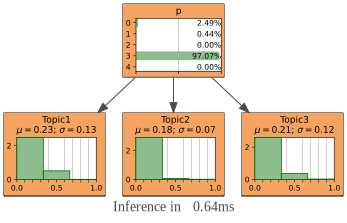


Potresti raccontarmi le difficoltà che riscontri quando studi?



KeyboardInterrupt: ignored

In [31]:
def create_a_node(tx, user_answer):
    tx.run("CREATE (n:Utterance {text: $user_answer})", user_answer = user_answer)


def rec_interactions(tx, user_answer):
    tx.run(
        "MATCH (n:Utterance) WHERE NOT EXISTS ((n)-[:FOLLOWED_BY]->(:Utterance)) WITH n "
        "CREATE (n2:Utterance {text: $user_answer}) "
        "CREATE (n)-[:FOLLOWED_BY]->(n2)", user_answer = user_answer)

language_key = "fb821673335b408f9b324740f5c3291a"
language_endpoint = "https://psymonitor.cognitiveservices.azure.com/"

from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential


def analyseSentiment(text):
    ta_credential = AzureKeyCredential(language_key)
    text_analytics_client = TextAnalyticsClient(
        endpoint=language_endpoint,
        credential=ta_credential)
    return text_analytics_client.analyze_sentiment([text], show_opinion_mining=True)[0]


def maxEntropy(dictionary):
    max_elem_name = max(dictionary.items(), key=lambda x: x[1])[0]
    return max_elem_name

negative = 0
neutral = 0
positive = 0

personality = zeros(5)

personality[0] = val_1
personality[1] = val_2
personality[2] = val_3
personality[3] = val_4
personality[4] = val_5

list_of_evi = {}

def setEvidence(max_elem_name, neg, neu, pos, f_1, f_2, f_3, f_4, f_5):
    global topic_sen_dis
    topic_sen_dis = zeros(3)
    topic_sen_dis[0] = neg
    topic_sen_dis[1] = neu
    topic_sen_dis[2] = pos
    personality[0] = f_1
    personality[1] = f_2
    personality[2] = f_3
    personality[3] = f_4
    personality[4] = f_5
    list_of_evi['p'] = personality
    list_of_evi[max_elem_name] = topic_sen_dis
    ie.setEvidence(list_of_evi)

#ie.setEvidence({'p': personality})
node_count = 0

while True:
    d = {'Topic1': ie.posterior('Topic1').entropy(), 'Topic2': ie.posterior('Topic2').entropy(), 'Topic3': ie.posterior('Topic3').entropy()}
    max_ent_elem = maxEntropy(d)

    print()
    print(bn.variableFromName(max_ent_elem).description())

    print()
    answer = input("Enter your answer: ")
    result = analyseSentiment(answer)

    if node_count == 0:
      with driver.session(database="neo4j") as session:
        session.execute_write(create_a_node, answer)
      node_count += 1
    else:
      with driver.session(database="neo4j") as session:
        session.execute_write(rec_interactions, answer)

    # result = analyseSentiment("Non mi piace il corso di programmazione. Il prof mi odia.")
    negative = result.confidence_scores.negative
    neutral = result.confidence_scores.neutral
    positive = result.confidence_scores.positive
    print("Negative: {}".format(result.confidence_scores.negative))
    print("Neutral: {}".format(result.confidence_scores.neutral))
    print("Positive: {}".format(result.confidence_scores.positive))
    for mined_opinion in result.sentences[0].mined_opinions:
        target = mined_opinion.target
        print("'{}' target '{}'".format(target.sentiment, target.text))
        print("Target score:\nPositive={0:.2f}\nNegative={1:.2f}\n".format(
            target.confidence_scores.positive,
            target.confidence_scores.negative,
        ))
        for assessment in mined_opinion.assessments:
            print("'{}' assessment '{}'".format(assessment.sentiment, assessment.text))
            print("Assessment score:\nPositive={0:.2f}\nNegative={1:.2f}\n".format(
                assessment.confidence_scores.positive,
                assessment.confidence_scores.negative,
            ))

    print()
    print('Entropy of Topics before establishing the evidence:')
    print('Entropy of Topic1 is', ie.posterior('Topic1').entropy())
    print('Entropy of Topic2 is', ie.posterior('Topic2').entropy())
    print('Entropy of Topic3 is', ie.posterior('Topic3').entropy())

    print()
    print("Negative, neutral, positive values before establishing the evidence:")
    print("Negative:", negative)
    print("Neutral:", neutral)
    print("Positive:", positive)

    print()
    print("BN before establishing the evidence")
    print()
    ie.makeInference()
    gnb.showInference(bn)

    print()
    print("Personality node before establishing the evidence")
    print()
    gnb.showProba(ie.posterior("p"))
    print()
    print(ie.posterior('p')[0])
    print(ie.posterior('p')[1])
    print(ie.posterior('p')[2])
    print(ie.posterior('p')[3])
    print(ie.posterior('p')[4])

    print()
    print("Node Topic1 before establishing the evidence")
    print()
    gnb.showProba(ie.posterior("Topic1"))
    print()
    print(ie.posterior('Topic1')[0])
    print(ie.posterior('Topic1')[1])
    print(ie.posterior('Topic1')[2])

    print()
    print("Node Topic2 before establishing the evidence")
    print()
    gnb.showProba(ie.posterior("Topic2"))
    print()
    print(ie.posterior('Topic2')[0])
    print(ie.posterior('Topic2')[1])
    print(ie.posterior('Topic2')[2])

    print()
    print("Node Topic3 before establishing the evidence")
    print()
    gnb.showProba(ie.posterior("Topic3"))
    print()
    print(ie.posterior('Topic3')[0])
    print(ie.posterior('Topic3')[1])
    print(ie.posterior('Topic3')[2])

    print()
    print("Dictionary before establishing the evidence")
    print(list_of_evi)
    print()

    val_1 = ie.posterior('p')[0]
    val_2 = ie.posterior('p')[1]
    val_3 = ie.posterior('p')[2]
    val_4 = ie.posterior('p')[3]
    val_5 = ie.posterior('p')[4]

    setEvidence(max_ent_elem, negative, neutral, positive, val_1, val_2, val_3, val_4, val_5)

    print()
    print("Dictionary after establishing the evidence")
    print(list_of_evi)
    print()

    print()
    print("Personality node after establishing the evidence")
    print()
    ie.makeInference()
    gnb.showProba(ie.posterior("p"))
    print()
    print(ie.posterior('p')[0])
    print(ie.posterior('p')[1])
    print(ie.posterior('p')[2])
    print(ie.posterior('p')[3])
    print(ie.posterior('p')[4])

    print()
    print("Node Topic1 after establishing the evidence")
    print()
    gnb.showProba(ie.posterior("Topic1"))
    print()
    print(ie.posterior('Topic1')[0])
    print(ie.posterior('Topic1')[1])
    print(ie.posterior('Topic1')[2])

    print()
    print("Node Topic2 after establishing the evidence")
    print()
    gnb.showProba(ie.posterior("Topic2"))
    print()
    print(ie.posterior('Topic2')[0])
    print(ie.posterior('Topic2')[1])
    print(ie.posterior('Topic2')[2])

    print()
    print("Node Topic3 after establishing the evidence")
    print()
    gnb.showProba(ie.posterior("Topic3"))
    print()
    print(ie.posterior('Topic3')[0])
    print(ie.posterior('Topic3')[1])
    print(ie.posterior('Topic3')[2])

    print()
    print('Entropy of Topics after establishing the evidence:')
    print('Entropy of Topic1 is', ie.posterior('Topic1').entropy())
    print('Entropy of Topic2 is', ie.posterior('Topic2').entropy())
    print('Entropy of Topic3 is', ie.posterior('Topic3').entropy())

    print()
    print("BN after establishing the evidence")
    print()
    gnb.showInference(bn, evs = list_of_evi)